In [1]:
import json
import csv
import pandas as pd
import numpy as np
import os
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

business_data=pd.read_csv("/content/drive/MyDrive/nlp_data/yelp_academic_dataset_business.csv")
review_data=pd.read_csv('/content/drive/MyDrive/nlp_data/yelp_academic_dataset_review.csv')

Mounted at /content/drive


In [3]:
#business_data.head()
#business_data.info()
df_business = business_data[business_data['categories'].notna()] #take out missing ones
df_business.shape
#null_count=df_business.isna().sum()
#print(null_count)

(150243, 14)

In [ ]:
#city_unique=business_data["city"].unique()
state_unique=business_data["state"].unique()
for value in state_unique:
  print(value)

CA
MO
AZ
PA
TN
FL
IN
LA
AB
NV
ID
DE
IL
NJ
NC
CO
WA
HI
UT
TX
MT
MI
SD
XMS
MA
VI
VT


# eda of business data

In [4]:
#Draw the top 10 categories
temp1 = ';'.join(df_business['categories'])
temp2 = re.split(';|,', temp1)
temp3 = [item.lstrip() for item in temp2]
bus_catg = pd.DataFrame(temp3,columns=['category'])

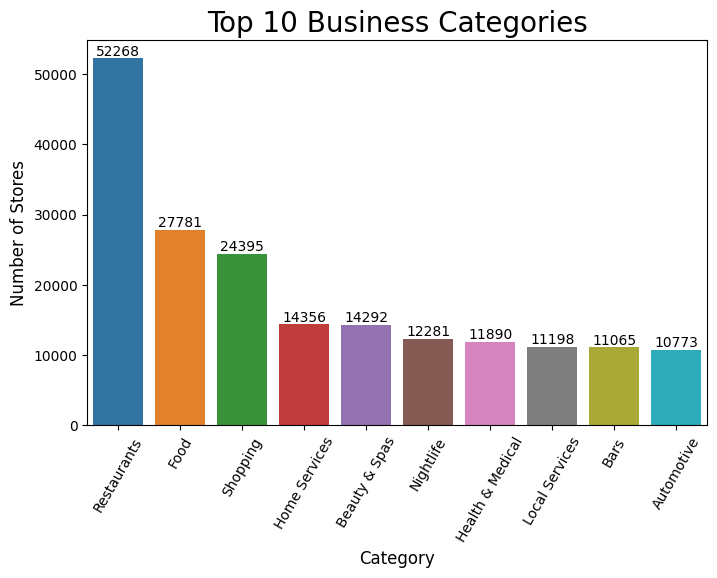

In [7]:
catg_count = bus_catg.category.value_counts()
catg_count = catg_count.sort_values(ascending = False)
catg_count = catg_count.iloc[0:10]
fig = plt.figure(figsize=(8, 5))
axis = sns.barplot(x=catg_count.index, y=catg_count.values)
plt.title("Top 10 Business Categories",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 60)
plt.ylabel('Number of Stores', fontsize = 12)
plt.xlabel('Category', fontsize = 12)

r = axis.patches
labels = catg_count.values
for rect, label in zip(r, labels):
    height = rect.get_height()
    axis.text(rect.get_x() + rect.get_width()/2, height + 10, label, ha='center', va='bottom')


In [8]:
#select restaurant data
restaurant_data=df_business[df_business["categories"].str.contains("Food",flags=re.IGNORECASE)|df_business["categories"].str.contains("Restaurant",flags=re.IGNORECASE)]
restaurant_data.shape

(64629, 14)

In [9]:
null_count1=restaurant_data.isna().sum()
print(null_count1)

business_id        0
name               0
address          738
city               0
state              0
postal_code       26
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       877
categories         0
hours           9336
dtype: int64


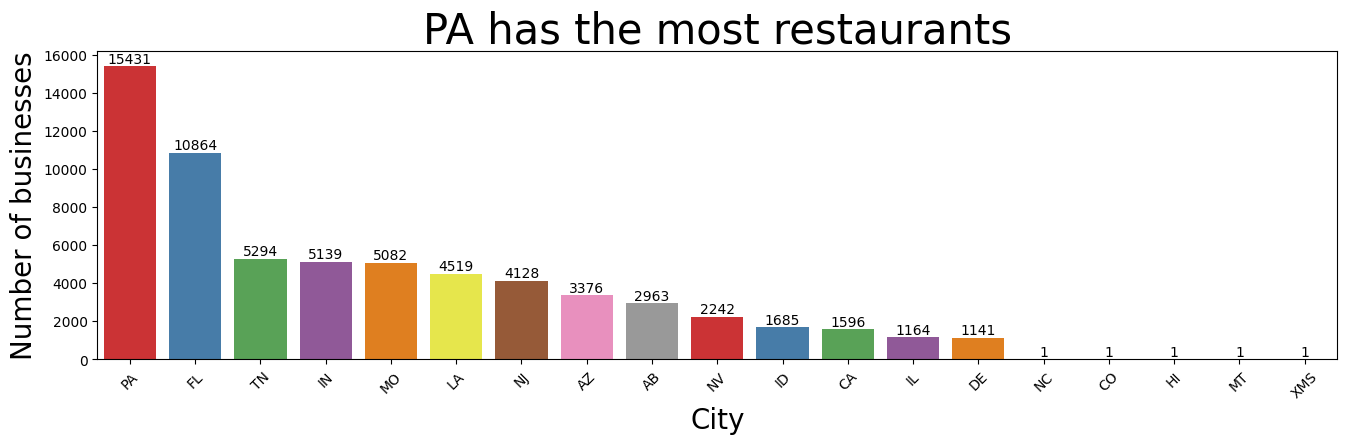

In [10]:
#Draw the top 20 cities
x=restaurant_data['state'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
axis = sns.barplot(x=x.index, y=x.values, palette = 'Set1')
plt.title("PA has the most restaurants",fontsize=30)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Number of businesses', fontsize=20)
plt.xlabel('City', fontsize=20)

#adding the text labels
rects = axis.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [11]:
#Filter all restaurants in PA
df_PA_data=restaurant_data[restaurant_data['state'] == 'PA']
df_PA_data.shape

(15431, 14)

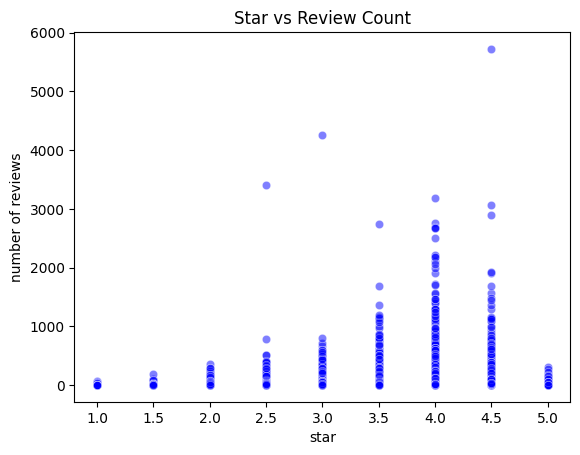

In [17]:
#Relationship between restaurant ratings and number of reviews
x = df_PA_data['stars']
y = df_PA_data['review_count']
sns.scatterplot(x=x, y=y, color='b', alpha=0.5)
plt.title('Star vs Review Count')
plt.xlabel('star')
plt.ylabel('number of reviews')
plt.show()

#review data

In [ ]:
review_data.head()
#review_data.info()
#review_data.shape

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [18]:
#Filter the comments to select those with the same business id as df_PA_data
df_review_res = review_data[review_data['business_id'].isin(df_PA_data['business_id'])]
df_review_res=df_review_res.drop(['user_id','date','useful','funny','cool'],axis=1)
df_review_res.shape
#df_review_res.to_csv('/content/drive/MyDrive/nlp_data/review_res.csv', index=False)

(1186583, 4)

In [19]:
df_review_res.head()

,review_id,business_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is..."
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo..."
5,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,I am a long term frequent customer of this est...
7,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,Amazingly amazing wings and homemade bleu chee...
13,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,Good food--loved the gnocchi with marinara\nth...


In [ ]:
print(df_review_res.shape)
null_count2=df_review_res.isna().sum()
print(null_count2)

(1186583, 4)
review_id      0
business_id    0
stars          0
text           0
dtype: int64


# Data Preprocessing

Data Cleaning

In [22]:
def data_clean(text):
  https = re.sub(r'http\S+', ' ', text)
  com = re.sub(r"www\.[A-Za-z]*\.com", " ", https)
  com_end = re.sub(r'[A-Za-z]*\.com', ' ', com)
  drop_numbers= re.sub(r'\d+', '', com_end)
  drop_space=" ".join(drop_numbers.split())
  punct = list(string.punctuation)
  drop_punctuation="".join([w for w in drop_space if w not in punct])
  return drop_punctuation

In [23]:
df_review_res['text']=df_review_res['text'].apply(data_clean)

In [ ]:
df_review_res.head()

,review_id,business_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,If you decide to eat here just be aware it is ...
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,Wow Yummy different delicious Our favorite is ...
5,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,I am a long term frequent customer of this est...
7,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,Amazingly amazing wings and homemade bleu chee...
13,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,Good foodloved the gnocchi with marinara the b...


**Case Folding**

In [24]:
df_review_res.text = df_review_res.text.str.lower()#Lowercase all text
df_review_res.head()

,review_id,business_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite is ...
5,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...
7,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,amazingly amazing wings and homemade bleu chee...
13,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,good foodloved the gnocchi with marinara the b...


**Remove newlines**--
This function will remove all the occurrences of newlines, tabs, and combinations

In [25]:
df_review_res=df_review_res.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')

In [ ]:
df_review_res.head()

,review_id,business_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"if you decide to eat here, just be aware it is..."
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,"wow! yummy, different, delicious. our favo..."
5,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...
7,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,amazingly amazing wings and homemade bleu chee...
13,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,good food--loved the gnocchi with marinara\nth...


**Stopwords and Lemmatize**

In [20]:
import nltk
nltk.download("popular")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [26]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [27]:
def stopwords(text):
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)

In [28]:
def lemma(all_content):
    tokens = word_tokenize(all_content)
    for i, content in enumerate(tokens):
        word = tokens[i]
        word = lemmatizer.lemmatize(word, pos='v')
        word = lemmatizer.lemmatize(word, pos='n')
        word = lemmatizer.lemmatize(word, pos='r')
        tokens[i] = lemmatizer.lemmatize(word, pos='a')
    return ' '.join(tokens)

In [29]:
# Apply function
df_review_res['processed_text'] = df_review_res['text'].apply(stopwords)

In [30]:
df_review_res['processed_text'] = df_review_res['processed_text'].apply(lemma)

In [31]:
df_review_res.head()

,review_id,business_id,stars,text,processed_text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,decide eat aware go take hour begin end try mu...
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite is ...,wow yummy different delicious favorite lamb cu...
5,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,long term frequent customer establishment go o...
7,_ZeMknuYdlQcUqng_Im3yg,LHSTtnW3YHCeUkRDGyJOyw,5.0,amazingly amazing wings and homemade bleu chee...,amazingly amaze wing homemade bleu cheese ribe...
13,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,good foodloved the gnocchi with marinara the b...,good foodloved gnocchi marinara bake eggplant ...


In [ ]:
df_review_res.to_csv('/content/drive/MyDrive/nlp_data/review_processed.csv', index=False)